In [1]:
import numpy as np 
import pandas as pd 
import cv2

In [2]:
data = pd.read_csv('../input/facial-expression/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
len(data.iloc[0]['pixels'].split())

2304

In [4]:
labels=['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [5]:
import matplotlib.pyplot as plt

img = [int(i) for i in data.iloc[0]['pixels'].split()]
img=np.array(img)
img=img.reshape(48,48)

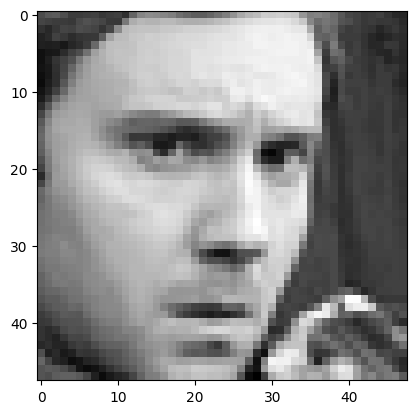

In [6]:
plt.imshow(img,cmap='gray')

In [7]:
def getdata(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    data=pd.read_csv(path)

    X,y=[],[]

    for i in range(len(data)):
        if data.iloc[i]['emotion'] != 1:
            if data.iloc[i]['emotion'] == 0:
                if anger<=4000:
                    y.append(data.iloc[i]['emotion'])
                    img=[int(i) for i in data.iloc[i]['pixels'].split()]
                    X.append(img)
                    anger+=1
                else:
                    pass
            if data.iloc[i]['emotion'] == 2:
                if fear<=4000:
                    y.append(data.iloc[i]['emotion'])
                    img=[int(i) for i in data.iloc[i]['pixels'].split()]
                    X.append(img)
                    fear+=1
                else:
                    pass
            if data.iloc[i]['emotion'] == 3:
                if happy<=4000:
                    y.append(data.iloc[i]['emotion'])
                    img=[int(i) for i in data.iloc[i]['pixels'].split()]
                    X.append(img)
                    happy+=1
                else:
                    pass
            if data.iloc[i]['emotion'] == 4:
                if sad<=4000:
                    y.append(data.iloc[i]['emotion'])
                    img=[int(i) for i in data.iloc[i]['pixels'].split()]
                    X.append(img)
                    sad+=1
                else:
                    pass
            if data.iloc[i]['emotion'] == 5:
                if surprise<=4000:
                    y.append(data.iloc[i]['emotion'])
                    img=[int(i) for i in data.iloc[i]['pixels'].split()]
                    X.append(img)
                    surprise+=1
                else:
                    pass
            if data.iloc[i]['emotion'] == 6:
                if neutral<=4000:
                    y.append(data.iloc[i]['emotion'])
                    img=[int(i) for i in data.iloc[i]['pixels'].split()]
                    X.append(img)
                    neutral+=1
                else:
                    pass

    return X, y
            

In [8]:
X,y = getdata('../input/facial-expression/fer2013.csv')

In [9]:
np.unique(y,return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [10]:
X=np.array(X)/255.0
y=np.array(y)

In [11]:
y2=[]
for i in y:
    if i != 6:
        y2.append(i)
    else:
        y2.append(1)
np.unique(y2,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

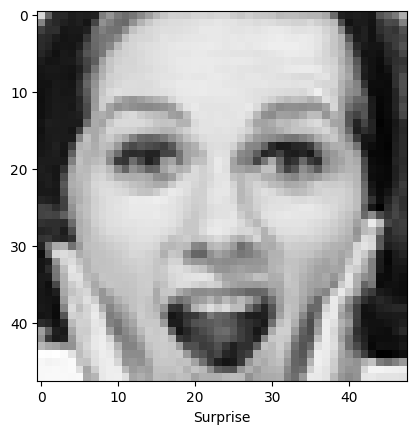

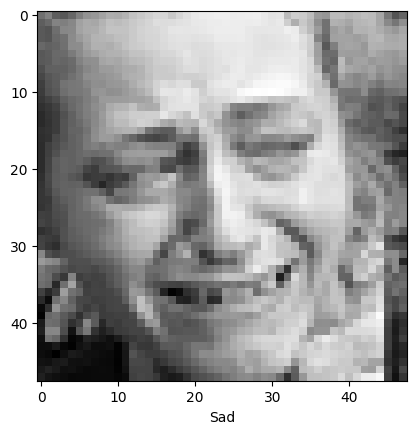

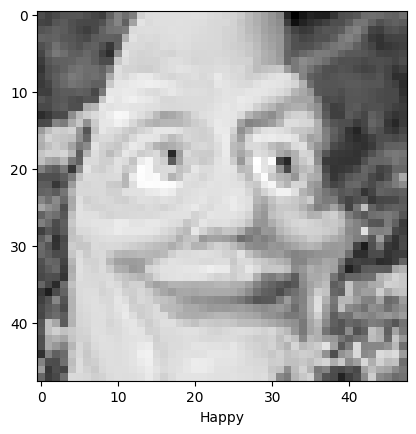

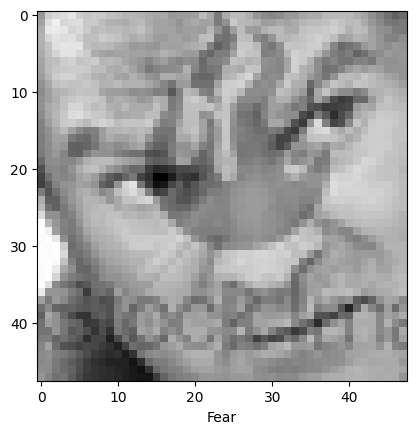

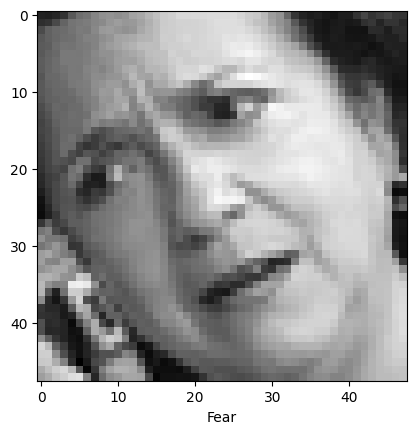

In [12]:
for i in range(5):
    r=np.random.randint((1),24000,1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(labels[y2[r]])

In [13]:
X=X.reshape(len(X),48,48,1)
X.shape

(24006, 48, 48, 1)

In [14]:
from keras.utils import to_categorical
ynew = to_categorical(y2,num_classes=6)
len(y2),ynew.shape

2024-04-17 08:14:15.076598: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 08:14:15.076739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 08:14:15.227538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(24006, (24006, 6))

In [15]:
y2[200],ynew[200]

(2, array([0., 0., 1., 0., 0., 0.]))

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

In [17]:
model=Sequential()

shape=(48,48,1)

model.add(Conv2D(64, (5, 5), input_shape=shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.fit(X, ynew, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
  6/301 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.1558 - loss: 6.6382 

I0000 00:00:1713341678.191418      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2292 - loss: 2.5993

W0000 00:00:1713341689.081753      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2293 - loss: 2.5979 - val_accuracy: 0.0248 - val_loss: 3.3288
Epoch 2/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3047 - loss: 1.9300 - val_accuracy: 0.2649 - val_loss: 2.1019
Epoch 3/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3938 - loss: 1.5507 - val_accuracy: 0.1104 - val_loss: 3.1398
Epoch 4/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4625 - loss: 1.3917 - val_accuracy: 0.2699 - val_loss: 1.9191
Epoch 5/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4888 - loss: 1.3275 - val_accuracy: 0.4084 - val_loss: 1.5921
Epoch 6/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5055 - loss: 1.2797 - val_accuracy: 0.4636 - val_loss: 1.4720
Epoch 7/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5439 - loss: 1.1793 - val_accuracy: 0.4898 - val_loss: 1.4049
Epoch 8/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5765 - loss: 1.1000 - val_accuracy: 0.39

In [19]:
model.save('EmotionDetectionModel.h5')

In [20]:
import cv2
testimg = cv2.imread('/kaggle/input/happy-test-image/HappyManThumbsUp.jpg',0)

In [21]:
testimg=cv2.resize(testimg,(48,48))

In [22]:
testimg=testimg.reshape(1,48,48,1)

In [23]:
prediction = model.predict(testimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [24]:
prediction = np.argmax(prediction)
print(labels[prediction])

Fear
